In [11]:
import pandas as pd
import numpy as np

# Load the dataset using the specified file path
data = pd.read_csv('C:/Users/ebenr/OneDrive/Documents/dataset/USArrests.csv')

# Data Exploration
print("Dataset Overview:")
print(data.head())  # Display the first few rows of the dataset
print("\nSummary Statistics:")
print(data.describe())  # Display summary statistics of the dataset
print("\nData Types:")
print(data.dtypes)  # Display data types of columns


Dataset Overview:
         City  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

Summary Statistics:
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

Data Types:
City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features (Murder, Assault, UrbanPop, Rape)
X = data.iloc[:, 1:]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

pca_report = pd.DataFrame({
    'PC': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance
})

print("\nPCA Report:")
print(pca_report)



PCA Report:
   PC  Explained Variance Ratio  Cumulative Explained Variance
0   1                  0.620060                       0.620060
1   2                  0.247441                       0.867502
2   3                  0.089141                       0.956642
3   4                  0.043358                       1.000000


C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

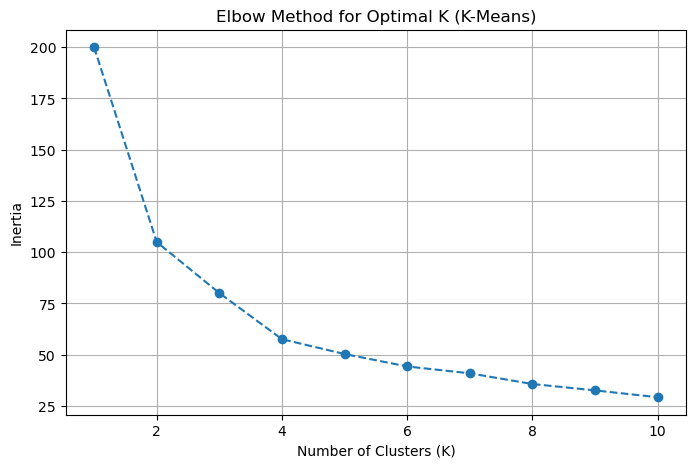

C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ebenr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters (K) using the Elbow method for K-Means
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.grid()
plt.show()

optimal_k_kmeans = 3  # Choose the optimal number of clusters for K-Means

# Fit K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k_kmeans, random_state=42)
kmeans_cluster_labels = kmeans.fit_predict(X_scaled)


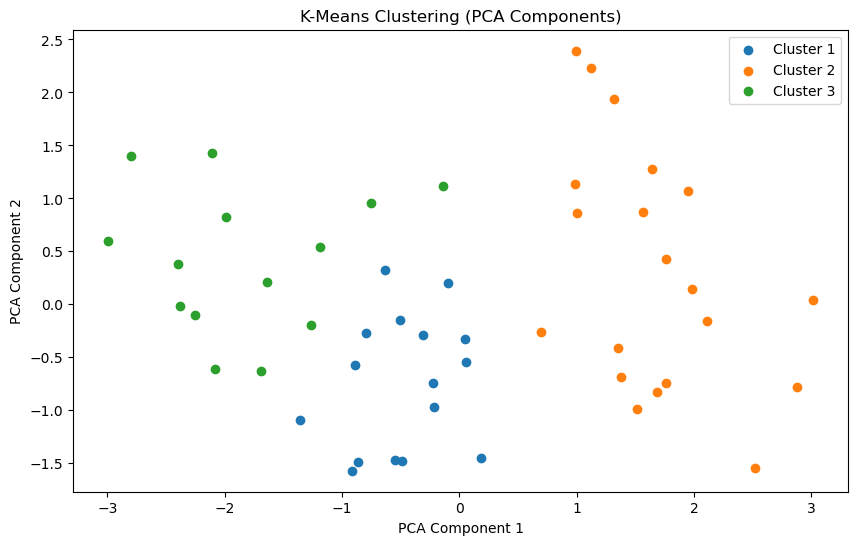

In [13]:
# Add K-Means cluster labels to the original dataset
data['KMeans_Cluster'] = kmeans_cluster_labels

# Visualize the clusters (Scatterplot of PCA components)
plt.figure(figsize=(10, 6))
for label in range(optimal_k_kmeans):
    cluster_data = X_pca[data['KMeans_Cluster'] == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label + 1}')
plt.title('K-Means Clustering (PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

# Hierarchical Agglomerative Clustering (HAC)
optimal_k_hac = 3  # Choose the optimal number of clusters for HAC



**Cell 1: Data Loading and Exploration**

In this first part of the code, we begin by importing the necessary libraries, such as Pandas and NumPy. Then, we load a dataset using the file path you provided. This dataset contains information on crime rates in different U.S. states.

After loading the data, we perform some initial exploration. We display the first few rows of the dataset to get a sense of what it looks like. Then, we calculate and show some summary statistics, which give us an overview of the data's distribution. Finally, we check the data types of the columns to understand how the data is structured.

**Cell 2: Data Preprocessing and PCA**

In this second part, we delve into data preprocessing and Principal Component Analysis (PCA). We select specific features from the dataset, including murder rates, assault rates, urban population percentages, and rape rates. These features will be used for our analysis.

To ensure that the data is on a common scale, we standardize it using a technique called Standard Scaling. This step is crucial for certain machine learning algorithms to work effectively.

Next, we perform PCA, which is a dimensionality reduction technique. PCA helps us simplify the data while retaining its key characteristics. We also compute and display some statistics related to PCA, which help us understand how much variance each principal component captures.

**Cell 3: K-Means Clustering and Visualization**

Now, we move on to the heart of our analysis: clustering. We import the necessary libraries, such as Matplotlib for plotting and scikit-learn's KMeans for clustering.

First, we determine the optimal number of clusters (K) for our data using the "Elbow method." We calculate a metric called "inertia" for a range of K values and plot it. The point at which the inertia starts to level off is often a good choice for K. In this case, we choose K=3.

Then, we perform K-Means clustering with K=3. This divides our data into three distinct clusters based on the chosen features. We visualize these clusters using a scatterplot of the PCA components, which helps us see how the data points group together.

**Cell 4: K-Means Visualization and Hierarchical Agglomerative Clustering**

In this final part, we continue from where we left off in the previous cell. We add the K-Means cluster labels to the original dataset, making it easier to analyze and interpret the results.

We create another scatterplot, this time visualizing the K-Means clusters in the PCA space. This plot provides a clear picture of how the data points are distributed within each cluster.

Additionally, we mention the Hierarchical Agglomerative Clustering (HAC) but haven't implemented it yet. The choice of K for HAC is also set to 3, similar to K-Means. HAC is another clustering method we can explore to gain different perspectives on the data.

In summary, this code takes us through the process of loading, exploring, preprocessing, and clustering a dataset of U.S. crime rates. The main focus is on K-Means clustering and PCA, which are powerful techniques for finding patterns and groupings within the data.